In [1]:
# Implementing Superdense Coding

In [2]:
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram

In [3]:
# A wants to share a 2-bit classical information (00, 01, 10, or 11) to B.
# Here q_0 is qubit-A and q_1 is qubit-B

In [8]:
# Preparing Bell state |psi>^00

def bell_state(qc):
    qc.h(0)
    qc.cx(0, 1)
    return qc

In [12]:
# Define protocol for person-A

def A_protocol(qc, msg):
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid") # If message is anything other than 00,01,10,11 it raises error
    if msg[1] == "1":
        qc.x(0) # If bit-1 of msg is "1", put X-gate on q_0
    if msg[0] == "1":
        qc.z(0) # If bit-0 of msg is "1", put Z-gate on q_0
    return qc

In [13]:
# Define protocol for person-B

def B_protocol(qc): # Same as bell state preparation, but in reverse order
    qc.cx(0, 1)
    qc.h(0)
    return qc

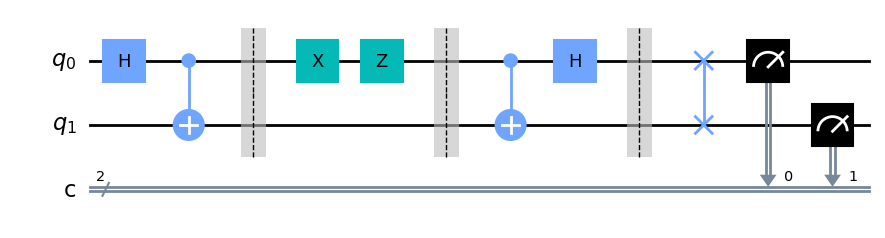

In [31]:
# Implementing superdense coding

sdc = QuantumCircuit(2,2) # Circuit for superdense coding

# Preparing bell state
sdc =  bell_state(sdc) 
sdc.barrier()

# Protocol for A
message = '11' # the msg that A wants to send. Try other values '00', '01', or '10'
sdc = A_protocol(sdc, message)
sdc.barrier()

# Protocol for B
sdc = B_protocol(sdc)
sdc.barrier()
sdc.swap(0,1) # Swap the qubits to match Qiskit's qubit ordering

# B measures both qubits at the end
for i in range(2):    
    sdc.measure(i,i)
sdc.draw()

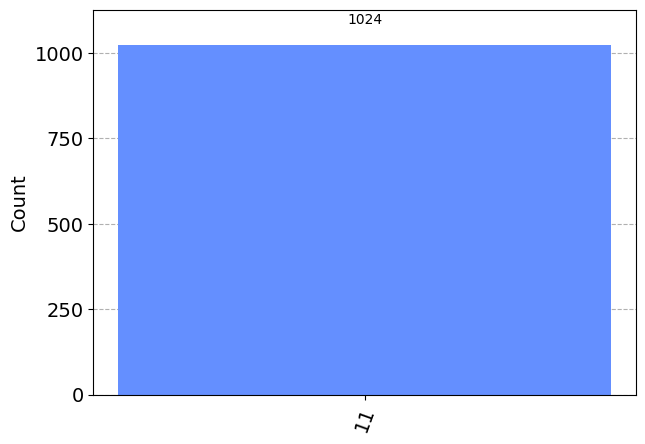

In [32]:
# Let us see the results

backend = Aer.get_backend('aer_simulator')
transpiled_sdc = transpile(sdc, backend)
shots = 1024
results = backend.run(transpiled_sdc, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [33]:
# As expected, B measures only the intended message that A wanted to send.

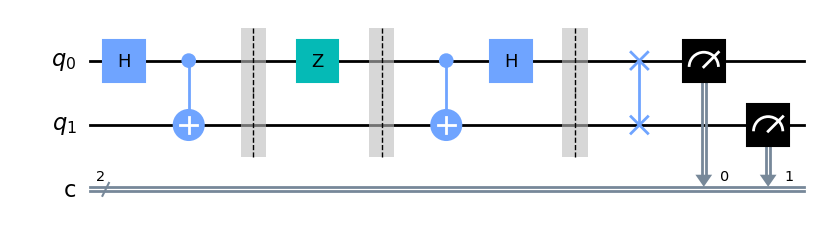

In [34]:
# Let us see implement for another message

sdc2 = QuantumCircuit(2,2) # Circuit for superdense coding

# Preparing bell state
sdc2 =  bell_state(sdc2) 
sdc2.barrier()

# Protocol for A
message = '10' # the msg that A wants to send.
sdc2 = A_protocol(sdc2, message)
sdc2.barrier()

# Protocol for B
sdc2 = B_protocol(sdc2)
sdc2.barrier()
sdc2.swap(0,1) # Swap the qubits to match Qiskit's qubit ordering

# B measures both qubits at the end
for i in range(2):    
    sdc2.measure(i,i)
sdc2.draw()

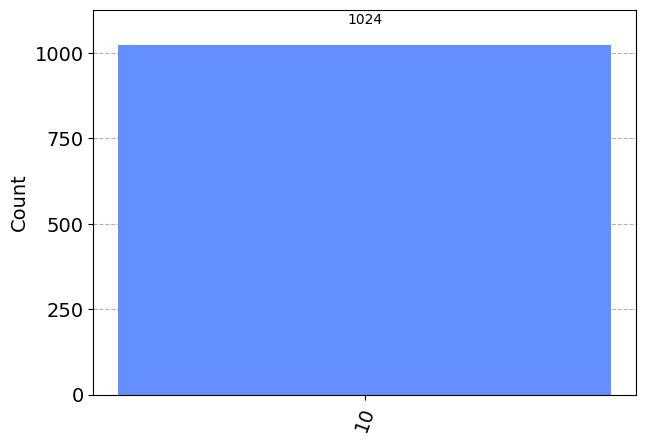

In [35]:
# Check results

backend = Aer.get_backend('aer_simulator')
transpiled_sdc2 = transpile(sdc2, backend)
shots = 1024
results = backend.run(transpiled_sdc2, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [36]:
# We got the intended message at the output again.